# **Problem Statement:**
Banks run into losses when customers don't pay their loans on time. Because of this, every year, banks have losses in crores, and this also impacts the country's economic growth to a large extent. In this Dataset , we look at various attributes such as funded amount, location, loan, balance, etc., to predict whether a person will be a loan defaulter.
To solve this problem, we  has created a training dataset of 67,463 rows and 35 columns and a testing dataset of 28,913 rows and 34 columns. The dataset demands a few pre-requisite skills like how to handle datasets, underfitting vs overfitting, and the ability to optimize “log_loss” to generalize well on unseen data.


# **Description of Attributes:**
•	ID: unique ID of representative

•	Loan Amount: loan amount applied

•	Funded Amount: loan amount funded

•	Funded Amount Investor: loan amount approved by the investors

•	Term: term of loan (in months)

•	Batch Enrolled: batch numbers to representatives

•	Interest Rate: interest rate (%) on loan

•	Grade: grade by the bank

•	Sub Grade: sub-grade by the bank

•	Debit to Income: ratio of representative's total monthly debt repayment divided by self-reported monthly income excluding mortgage

•	Delinquency - two years: number of 30+ days delinquency in past 2 - years

•	Inquires - six months: total number of inquiries in last 6 months

•	Open Account: number of open credit line in representative's - credit line

•	Public Record: number of derogatory public records

•	Revolving Balance: total credit revolving balance

•	Revolving Utilities: amount of credit a representative is using - relative to revolving_balance

•	Total Accounts: total number of credit lines available in - representatives credit line

•	Initial List Status: unique listing status of the loan - - W(Waiting), F(Forwarded)

•	Total Received Interest: total interest received till date

•	Total Received Late Fee: total late fee received till date

•	Recoveries: post charge off gross recovery

•	Collection Recovery Fee: post charge off collection fee

•	Collection 12 months Medical: total collections in last 12 months - excluding medical collections

•	Application Type: indicates when the representative is an individual or joint

•	Last week Pay: indicates how long (in weeks) a representative has paid EMI after batch enrolled

•	Accounts Delinquent: number of accounts on which the representative is delinquent

•	Total Collection Amount: total collection amount ever owed

•	Total Current Balance: total current balance from all accounts

•	Total Revolving Credit Limit: total revolving credit limit

•	Loan Status: 1 = Defaulter, 0 = Non-Defaulters



Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read Train and Test Data

In [2]:
train=pd.read_csv('/content/drive/MyDrive/intenship/train.csv')
test=pd.read_csv('/content/drive/MyDrive/intenship/test.csv')

In [3]:
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145


In [5]:
train.tail()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0
67462,65443173,15353,29875,14207.44860,59,BAT1930365,16.034631,B,D1,MORTGAGE,...,1.856480,0.366386,0,INDIVIDUAL,54,0,47,196960,66060,0


In [6]:
test.tail()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
28908,11537800,35000,35000,35000.0,60,BAT5629144,16.24,C,C5,MORTGAGE,...,0.0,0.0,0.0,0,INDIVIDUAL,109,0,0,883984,114000
28909,11538258,25000,25000,25000.0,60,BAT5629144,14.98,C,C3,MORTGAGE,...,0.0,0.0,0.0,0,INDIVIDUAL,104,0,0,513925,51800
28910,13147685,30000,30000,29950.0,60,BAT2136391,18.24,D,D5,MORTGAGE,...,0.0,0.0,0.0,1,INDIVIDUAL,83,0,0,296294,65600
28911,13917689,25000,25000,24950.0,60,BAT2136391,15.61,D,D1,MORTGAGE,...,0.0,0.0,0.0,0,INDIVIDUAL,83,0,0,428723,30400
28912,10763026,24925,24925,24925.0,60,BAT2575549,14.30,C,C1,MORTGAGE,...,0.0,0.0,0.0,0,INDIVIDUAL,109,0,0,283758,62900


In [7]:
train.shape

(67463, 35)

In [8]:
test.shape

(28913, 34)

# **Exploratory Data Analysis (EDA)**

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            28913 non-null  int64  
 1   Loan Amount                   28913 non-null  int64  
 2   Funded Amount                 28913 non-null  int64  
 3   Funded Amount Investor        28913 non-null  float64
 4   Term                          28913 non-null  int64  
 5   Batch Enrolled                28913 non-null  object 
 6   Interest Rate                 28913 non-null  float64
 7   Grade                         28913 non-null  object 
 8   Sub Grade                     28913 non-null  object 
 9   Employment Duration           28913 non-null  object 
 10  Home Ownership                28913 non-null  float64
 11  Verification Status           28913 non-null  object 
 12  Payment Plan                  28913 non-null  object 
 13  L

In [11]:
train.nunique()

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection R

In [12]:
test.nunique()

ID                              28913
Loan Amount                     15664
Funded Amount                   14552
Funded Amount Investor          22419
Term                                4
Batch Enrolled                     41
Interest Rate                   21675
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  22551
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 24447
Delinquency - two years            10
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               16204
Revolving Utilities             22494
Total Accounts                     70
Initial List Status                 2
Total Received Interest         28564
Total Received Late Fee         21535
Recoveries                      21613
Collection R

In [13]:
train.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [14]:
test.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [15]:
train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [16]:
test.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit'],
      dtype='object')

In [17]:
train.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [18]:
test.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
count,2.891300e+04,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,...,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,2.891300e+04,28913.000000
mean,2.944966e+07,16404.027462,15619.911113,14741.536698,54.543078,12.187577,79983.752348,22.159266,0.332065,0.276900,...,1917.754435,0.922863,50.624944,1.393220,0.019576,65.007574,0.000968,159.747553,1.530975e+05,25013.808425
std,2.206842e+07,8358.898287,8229.977503,7230.397758,8.991800,3.911259,45231.316383,8.657629,0.818869,0.663999,...,2109.442877,4.765042,336.450176,15.139809,0.138540,42.494090,0.031105,911.671785,1.391309e+05,22284.519460
min,1.297893e+06,1000.000000,1000.000000,1000.000000,36.000000,5.320000,14907.925920,0.730000,0.000000,0.000000,...,4.794657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.260000e+02,1000.000000
25%,8.272049e+06,9776.000000,9175.000000,9695.445501,58.000000,9.422042,50791.000000,15.622891,0.000000,0.000000,...,524.130000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,3.000000,4.397200e+04,9325.000000
50%,2.596622e+07,15600.000000,13200.000000,12930.601270,59.000000,11.688652,68894.324470,21.530000,0.000000,0.000000,...,1216.347147,0.027878,2.165909,0.579620,0.000000,60.000000,0.000000,30.000000,1.092860e+05,18848.000000
75%,4.855801e+07,21651.000000,21552.000000,19226.397540,59.000000,14.640000,94684.941810,28.840000,0.000000,0.000000,...,2474.594118,0.061107,4.610188,0.974739,0.000000,95.000000,0.000000,44.000000,2.222960e+05,33860.000000
max,7.226845e+07,35000.000000,35000.000000,35000.000000,60.000000,27.310000,406944.859000,39.629977,9.000000,5.000000,...,14313.816110,42.520996,4325.594909,743.166000,1.000000,161.000000,1.000000,27076.000000,1.183282e+06,233500.000000


<Axes: >

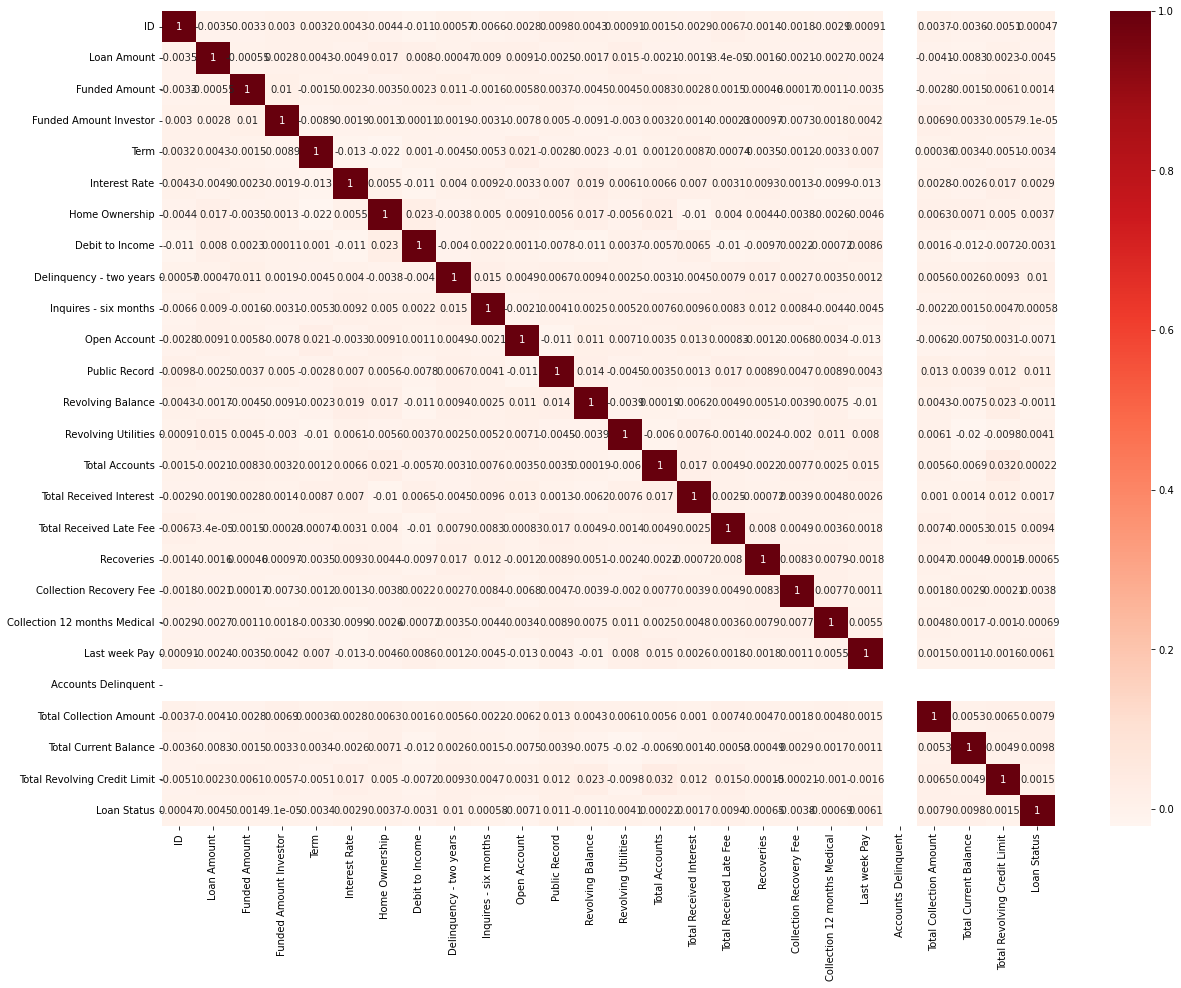

In [19]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(train.corr(),annot=True,cmap='Reds')

<Axes: >

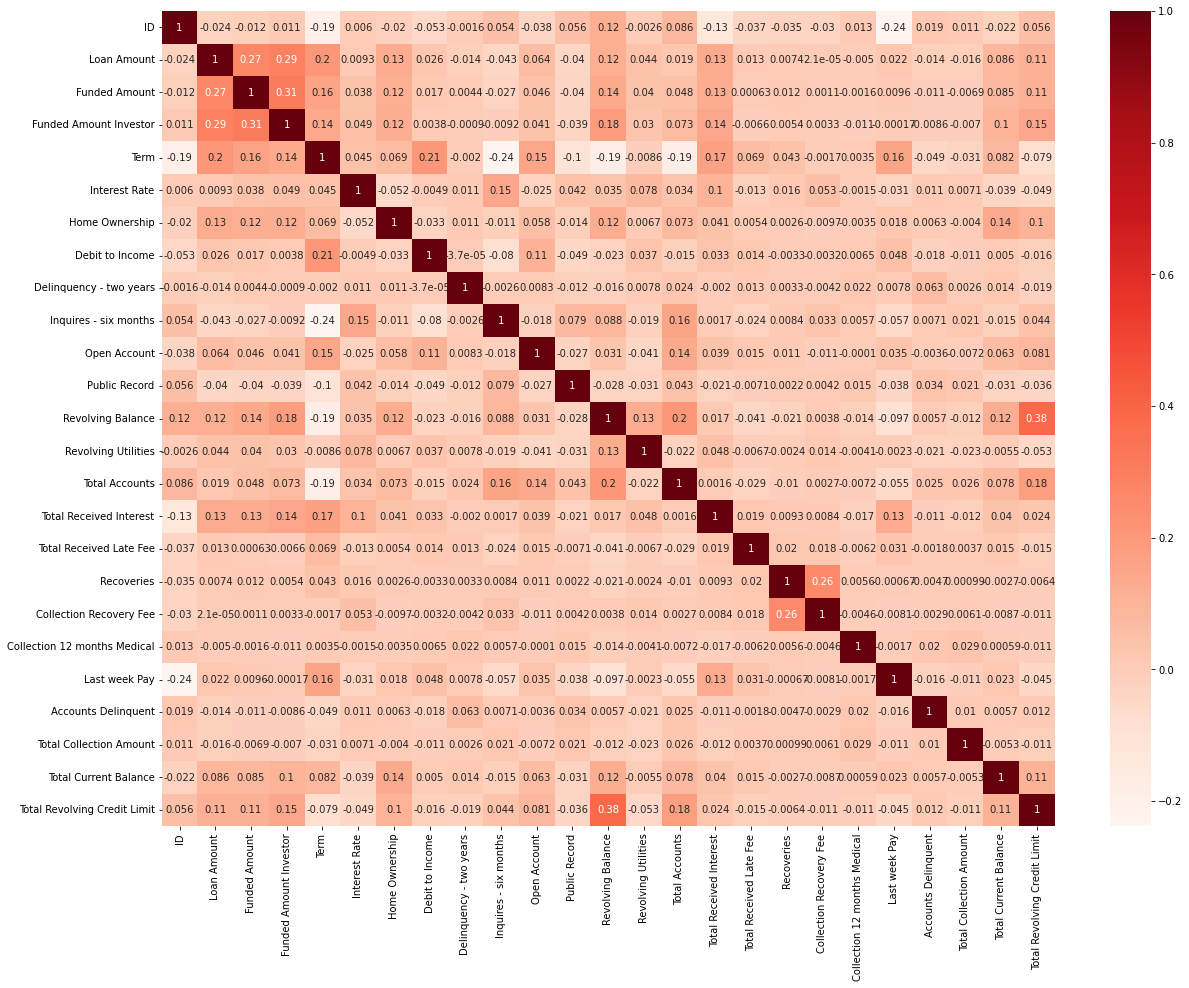

In [20]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(test.corr(),annot=True,cmap='Reds')

In [21]:
print(train['Batch Enrolled'].value_counts())

BAT3873588    3626
BAT1586599    3142
BAT1104812    2996
BAT2252229    2557
BAT2803411    2425
BAT1780517    2403
BAT1184694    2298
BAT2078974    2290
BAT2575549    2257
BAT4694572    2248
BAT4271519    2054
BAT2558388    1963
BAT3193689    1864
BAT1930365    1844
BAT2136391    1790
BAT2333412    1775
BAT3726927    1774
BAT4136152    1766
BAT5341619    1717
BAT5525466    1709
BAT5489674    1677
BAT5629144    1639
BAT1766061    1461
BAT2833642    1421
BAT5924421    1404
BAT2522922    1399
BAT2428731    1398
BAT4808022    1303
BAT4351734    1140
BAT5547201    1127
BAT5714674    1105
BAT3461431    1068
BAT224923      895
BAT1761981     894
BAT4722912     887
BAT2003848     842
BAT1467036     802
BAT5849876     768
BAT3865626     728
BAT5811547     711
BAT1135695     296
Name: Batch Enrolled, dtype: int64


In [22]:
print(test['Batch Enrolled'].value_counts())

BAT3873588    1623
BAT1586599    1404
BAT1104812    1341
BAT2252229    1297
BAT1780517    1166
BAT1184694    1086
BAT2078974    1074
BAT2803411    1071
BAT4694572    1057
BAT4271519     937
BAT3193689     890
BAT2558388     866
BAT3726927     851
BAT2575549     775
BAT4136152     756
BAT5489674     753
BAT2333412     753
BAT5924421     706
BAT2136391     704
BAT1930365     691
BAT5525466     655
BAT5629144     644
BAT5341619     615
BAT2522922     611
BAT1766061     605
BAT2833642     515
BAT3461431     492
BAT4808022     491
BAT2428731     487
BAT4722912     442
BAT4351734     439
BAT5714674     422
BAT5547201     412
BAT224923      409
BAT2003848     360
BAT1761981     327
BAT1467036     290
BAT5849876     277
BAT5811547     264
BAT3865626     250
BAT1135695     105
Name: Batch Enrolled, dtype: int64


In [23]:
print(train['Grade'].value_counts())

C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64


<Axes: xlabel='Grade', ylabel='count'>

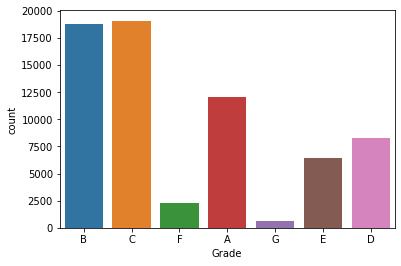

In [24]:
sns.countplot(x="Grade", data = train)

In [25]:
print(test['Grade'].value_counts())

C    8104
B    7996
A    5119
D    3952
E    2608
F     882
G     252
Name: Grade, dtype: int64


<Axes: xlabel='Grade', ylabel='count'>

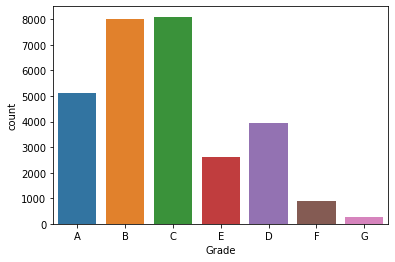

In [26]:
sns.countplot(x="Grade", data = test)

In [27]:
print(train['Sub Grade'].value_counts())

B4    4462
C1    4188
B3    3999
A5    3540
B2    3520
B5    3408
D1    3304
C4    3250
C2    3219
C3    3121
B1    2924
C5    2472
A4    2264
D4    2050
D2    1963
D5    1952
A2    1837
D3    1824
E2    1746
A3    1685
A1    1364
E3    1321
E1    1298
E4    1117
F2     947
F1     824
E5     769
F5     582
F3     578
G2     447
F4     441
G1     366
G5     284
G3     246
G4     151
Name: Sub Grade, dtype: int64


<Axes: title={'center': 'Loan Sub Grade'}, ylabel='Count'>

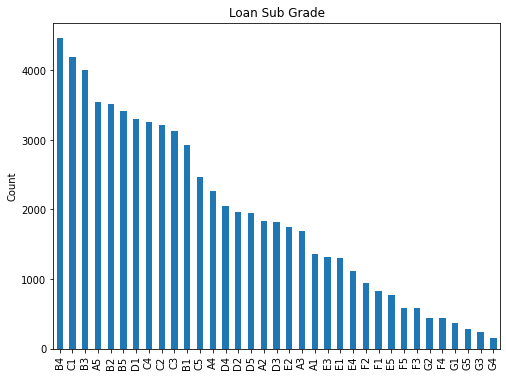

In [28]:

plt.figure(figsize=(8,6))
train['Sub Grade'].value_counts().plot(kind='bar', title='Loan Sub Grade', ylabel='Count')
     

In [29]:
print(test['Sub Grade'].value_counts())

B4    1902
C1    1815
B3    1709
A5    1512
C4    1496
B2    1457
C2    1452
B5    1446
C3    1387
D1    1333
B1    1278
C5    1164
A4    1017
D2     912
D4     889
D5     862
A2     821
D3     818
A3     726
E2     725
A1     572
E1     527
E3     523
E4     434
F2     362
E5     331
F1     311
F3     214
F5     193
F4     184
G2     152
G1     132
G5     116
G3      95
G4      46
Name: Sub Grade, dtype: int64


<Axes: title={'center': 'Loan Sub Grade'}, ylabel='Count'>

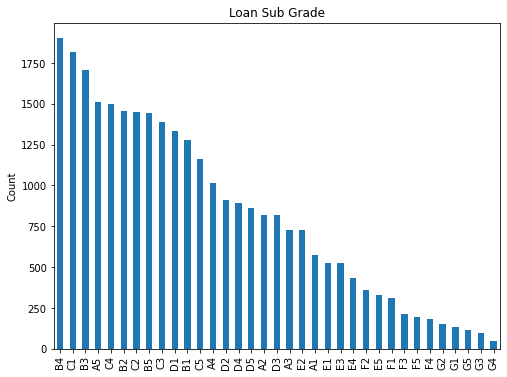

In [30]:

plt.figure(figsize=(8,6))
test['Sub Grade'].value_counts().plot(kind='bar', title='Loan Sub Grade', ylabel='Count')
     

In [31]:
print(train['Term'].value_counts())

59    43780
58    22226
36     1457
Name: Term, dtype: int64


<Axes: title={'center': 'Loan Term Distribution'}, xlabel='Term', ylabel='Count'>

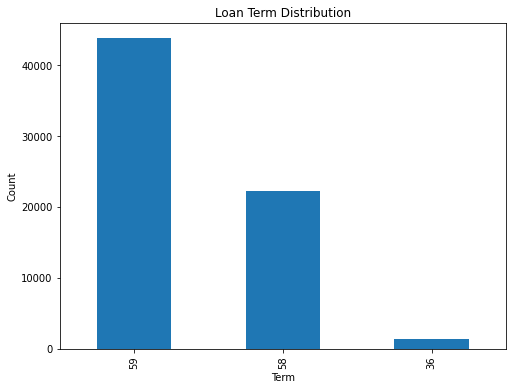

In [32]:

plt.figure(figsize=(8,6))
train['Term'].value_counts().plot(kind='bar', title='Loan Term Distribution', xlabel='Term', ylabel='Count')

In [33]:
print(test['Term'].value_counts())

59    13054
58     6541
36     5485
60     3833
Name: Term, dtype: int64


<Axes: title={'center': 'Loan Term Distribution'}, xlabel='Term', ylabel='Count'>

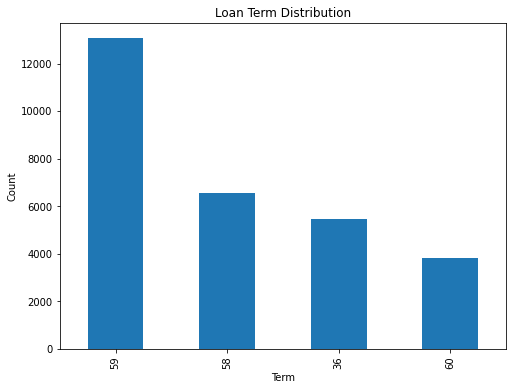

In [34]:

plt.figure(figsize=(8,6))
test['Term'].value_counts().plot(kind='bar', title='Loan Term Distribution', xlabel='Term', ylabel='Count')

In [35]:
print(train['Employment Duration'].value_counts())

MORTGAGE    36351
RENT        24150
OWN          6962
Name: Employment Duration, dtype: int64


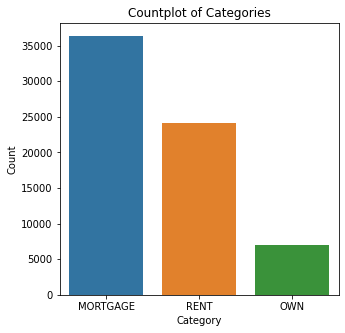

In [39]:
plt.figure(figsize=(5,5))
# create a list of categories in the desired sequence order
category_order = ['MORTGAGE', 'RENT', 'OWN']

# create a countplot with the desired sequence order
sns.countplot(x='Employment Duration', data=train, order=category_order)

# set the title and labels
plt.title('Countplot of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# display the plot
plt.show()

In [37]:
print(test['Employment Duration'].value_counts())

MORTGAGE    15530
RENT        10533
OWN          2850
Name: Employment Duration, dtype: int64


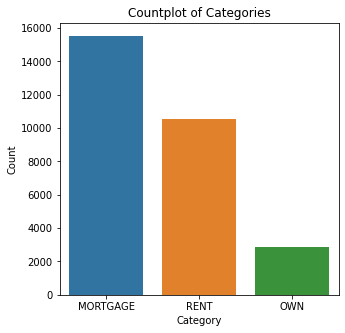

In [38]:
plt.figure(figsize=(5,5))
# create a list of categories in the desired sequence order
category_order = ['MORTGAGE', 'RENT', 'OWN']

# create a countplot with the desired sequence order
sns.countplot(x='Employment Duration', data=test, order=category_order)

# set the title and labels
plt.title('Countplot of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# display the plot
plt.show()

In [ ]:
print(train['Verification Status'].value_counts())

Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64


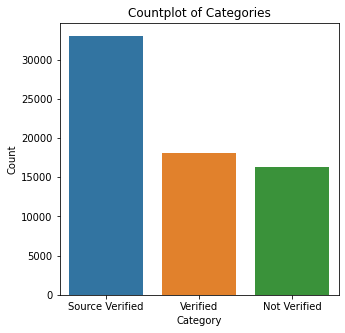

In [ ]:
plt.figure(figsize=(5,5))
# create a list of categories in the desired sequence order
category_order = ['Source Verified', 'Verified', 'Not Verified']

# create a countplot with the desired sequence order
sns.countplot(x='Verification Status', data=train, order=category_order)

# set the title and labels
plt.title('Countplot of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# display the plot
plt.show()

In [40]:
print(test['Verification Status'].value_counts())


Source Verified    13626
Verified            7981
Not Verified        7306
Name: Verification Status, dtype: int64


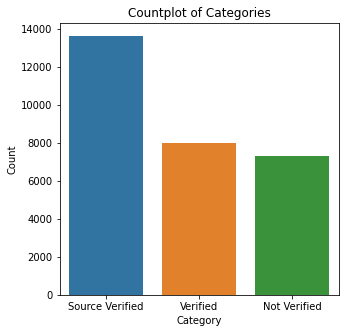

In [41]:
plt.figure(figsize=(5,5))
# create a list of categories in the desired sequence order
category_order = ['Source Verified', 'Verified', 'Not Verified']

# create a countplot with the desired sequence order
sns.countplot(x='Verification Status', data=test, order=category_order)

# set the title and labels
plt.title('Countplot of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# display the plot
plt.show()

In [42]:
print(train['Payment Plan'].value_counts())

n    67463
Name: Payment Plan, dtype: int64


<Axes: xlabel='Payment Plan', ylabel='count'>

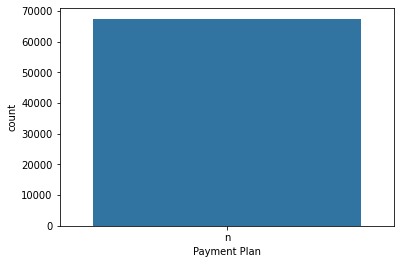

In [43]:
sns.countplot(x="Payment Plan", data = train)

In [44]:
print(test['Payment Plan'].value_counts())

n    28913
Name: Payment Plan, dtype: int64


<Axes: xlabel='Payment Plan', ylabel='count'>

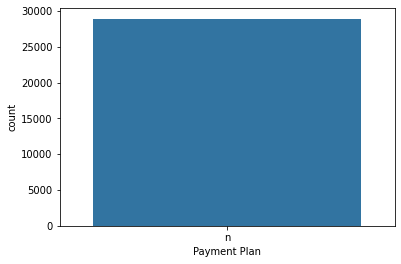

In [45]:
sns.countplot(x="Payment Plan", data = test)

In [46]:
print(train['Initial List Status'].value_counts())

w    36299
f    31164
Name: Initial List Status, dtype: int64


<Axes: xlabel='Initial List Status', ylabel='count'>

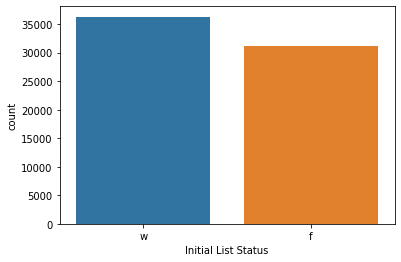

In [47]:
sns.countplot(x='Initial List Status', data = train)

In [48]:
print(test['Initial List Status'].value_counts())

w    15848
f    13065
Name: Initial List Status, dtype: int64


<Axes: xlabel='Initial List Status', ylabel='count'>

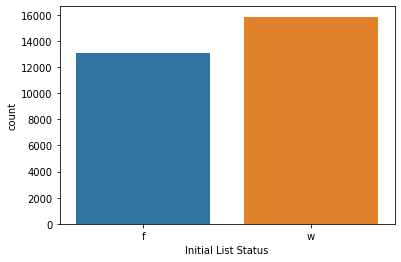

In [49]:
sns.countplot(x='Initial List Status', data = test)

In [50]:
print(train['Application Type'].value_counts())

INDIVIDUAL    67340
JOINT           123
Name: Application Type, dtype: int64


<Axes: xlabel='Application Type', ylabel='count'>

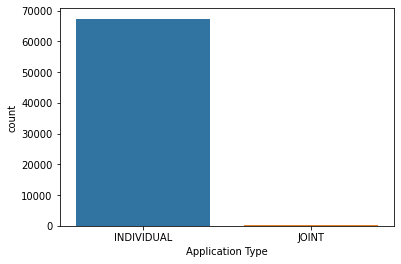

In [51]:
sns.countplot(x='Application Type', data = train)

In [52]:
print(test['Application Type'].value_counts())

INDIVIDUAL    28883
JOINT            30
Name: Application Type, dtype: int64


<Axes: xlabel='Application Type', ylabel='count'>

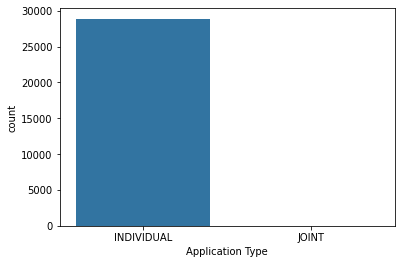

In [53]:
sns.countplot(x='Application Type', data = test)

In [54]:
print(train['Loan Status'].value_counts())

0    61222
1     6241
Name: Loan Status, dtype: int64


<Axes: xlabel='Loan Status', ylabel='count'>

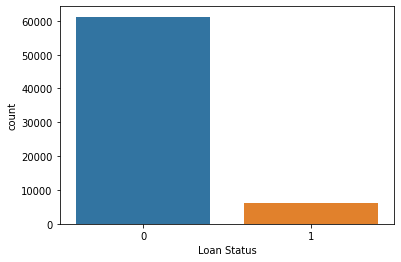

In [55]:
sns.countplot(x='Loan Status', data = train)

In [56]:
train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [57]:
test.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit'],
      dtype='object')

In [58]:
categorical_list=['Batch Enrolled', 'Grade', 'Sub Grade',
       'Employment Duration', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']

In [59]:
for i in categorical_list:
  train[i]=train[i].astype('category').cat.codes

In [60]:
categorical_list=['Batch Enrolled', 'Grade', 'Sub Grade',
       'Employment Duration', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']

In [61]:
for i in categorical_list:
  test[i]=test[i].astype('category').cat.codes

In [62]:
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,16,11.135007,1,13,0,...,2.498291,0.793724,0,0,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,4,12.237563,2,17,2,...,2.377215,0.974821,0,0,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,11,12.545884,5,18,0,...,4.316277,1.020075,0,0,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,15,16.731201,2,12,0,...,0.107020,0.749971,0,0,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,32,15.008300,2,18,0,...,1294.818751,0.368953,0,0,18,0,430,126029,22579,0


In [63]:
test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,56492997,17120,10365,16025.082690,59,18,12.163926,0,15,2,...,0.088031,8.425776,0.731797,0,0,135,0,24,475442,4364
1,22540813,7133,11650,12615.795600,59,20,6.564296,1,22,0,...,0.041237,6.157008,0.992918,0,0,56,0,1,72412,2573
2,9862181,25291,25825,11621.280830,59,5,14.729900,0,12,0,...,0.021745,5.705077,0.281580,0,0,3,0,26,284825,19676
3,10097822,30781,9664,15375.823510,59,32,10.523767,0,1,2,...,0.092398,2.469688,0.959162,0,0,21,0,32,40842,7226
4,47771809,8878,9419,7176.647582,58,29,9.997013,2,7,1,...,0.010354,2.127835,0.402315,0,0,104,0,33,90825,26145


In [64]:
train.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,18.875947,11.846258,1.815558,11.963002,0.819145,...,59.691578,1.125141,0.021301,0.001823,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,11.346994,3.718629,1.382840,7.405069,0.929574,...,357.026346,3.489885,0.144385,0.042661,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,0.000000,5.320006,0.000000,0.000000,0.000000,...,0.000036,0.000036,0.000000,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.000000,9.297147,1.000000,6.000000,0.000000,...,1.629818,0.476259,0.000000,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,19.000000,11.377696,2.000000,11.000000,0.000000,...,3.344524,0.780141,0.000000,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,28.000000,14.193533,3.000000,17.000000,2.000000,...,5.453727,1.070566,0.000000,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,40.000000,27.182348,6.000000,34.000000,2.000000,...,4354.467419,166.833000,1.000000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [65]:
test.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
count,2.891300e+04,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,...,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,2.891300e+04,28913.000000
mean,2.944966e+07,16404.027462,15619.911113,14741.536698,54.543078,18.652163,12.187577,1.812818,11.765123,0.827171,...,0.922863,50.624944,1.393220,0.019576,0.001038,65.007574,0.000968,159.747553,1.530975e+05,25013.808425
std,2.206842e+07,8358.898287,8229.977503,7230.397758,8.991800,11.314914,3.911259,1.364283,7.204788,0.933589,...,4.765042,336.450176,15.139809,0.138540,0.032196,42.494090,0.031105,911.671785,1.391309e+05,22284.519460
min,1.297893e+06,1000.000000,1000.000000,1000.000000,36.000000,0.000000,5.320000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.260000e+02,1000.000000
25%,8.272049e+06,9776.000000,9175.000000,9695.445501,58.000000,9.000000,9.422042,1.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,3.000000,4.397200e+04,9325.000000
50%,2.596622e+07,15600.000000,13200.000000,12930.601270,59.000000,19.000000,11.688652,2.000000,11.000000,0.000000,...,0.027878,2.165909,0.579620,0.000000,0.000000,60.000000,0.000000,30.000000,1.092860e+05,18848.000000
75%,4.855801e+07,21651.000000,21552.000000,19226.397540,59.000000,27.000000,14.640000,3.000000,16.000000,2.000000,...,0.061107,4.610188,0.974739,0.000000,0.000000,95.000000,0.000000,44.000000,2.222960e+05,33860.000000
max,7.226845e+07,35000.000000,35000.000000,35000.000000,60.000000,40.000000,27.310000,6.000000,34.000000,2.000000,...,42.520996,4325.594909,743.166000,1.000000,1.000000,161.000000,1.000000,27076.000000,1.183282e+06,233500.000000


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  int8   
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  int8   
 8   Sub Grade                     67463 non-null  int8   
 9   Employment Duration           67463 non-null  int8   
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  int8   
 12  Payment Plan                  67463 non-null  int8   
 13  L

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            28913 non-null  int64  
 1   Loan Amount                   28913 non-null  int64  
 2   Funded Amount                 28913 non-null  int64  
 3   Funded Amount Investor        28913 non-null  float64
 4   Term                          28913 non-null  int64  
 5   Batch Enrolled                28913 non-null  int8   
 6   Interest Rate                 28913 non-null  float64
 7   Grade                         28913 non-null  int8   
 8   Sub Grade                     28913 non-null  int8   
 9   Employment Duration           28913 non-null  int8   
 10  Home Ownership                28913 non-null  float64
 11  Verification Status           28913 non-null  int8   
 12  Payment Plan                  28913 non-null  int8   
 13  L

# **Handling Outliers**

<Axes: >

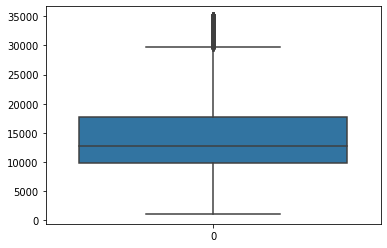

In [68]:
sns.boxplot(train['Funded Amount Investor'])

In [69]:
#Removing outliers.
q = train["Funded Amount Investor"].quantile(0.98)
df1= train[train["Funded Amount Investor"]<q]

<Axes: >

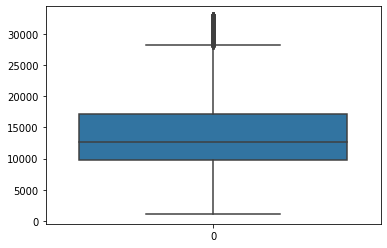

In [70]:
sns.boxplot(df1['Funded Amount Investor'])

<Axes: >

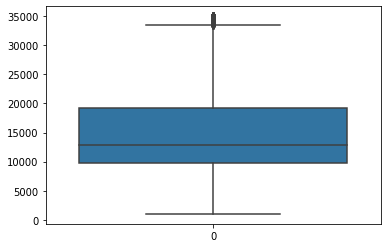

In [71]:
sns.boxplot(test['Funded Amount Investor'])

In [72]:
#Removing outliers.
q = test["Funded Amount Investor"].quantile(0.98)
df2= test[test["Funded Amount Investor"]<q]

<Axes: >

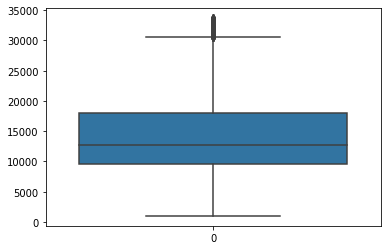

In [73]:
sns.boxplot(df2['Funded Amount Investor'])

<Axes: >

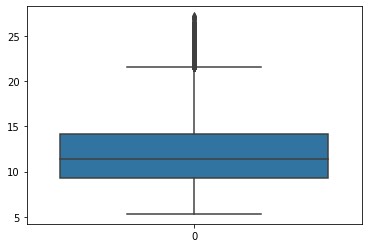

In [74]:
sns.boxplot(train['Interest Rate'])

In [75]:
q = train["Interest Rate"].quantile(0.98)
df1= train[train["Interest Rate"]<q]

<Axes: >

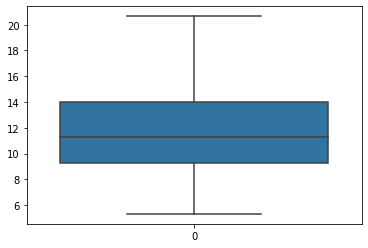

In [76]:
sns.boxplot(df1['Interest Rate'])

<Axes: >

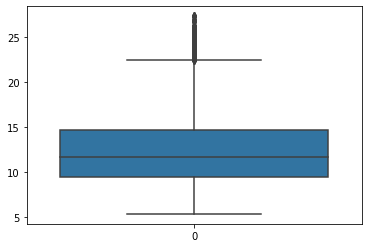

In [77]:
sns.boxplot(test['Interest Rate'])

In [78]:
q = test["Interest Rate"].quantile(0.98)
df2= test[test["Interest Rate"]<q]

<Axes: >

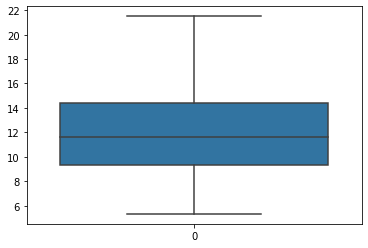

In [79]:
sns.boxplot(df2['Interest Rate'])

<Axes: >

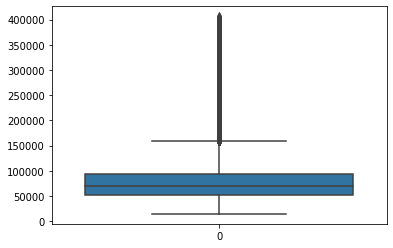

In [80]:
sns.boxplot(train['Home Ownership'])

In [81]:
q = train["Home Ownership"].quantile(0.98)
df1= train[train["Home Ownership"]<q]

<Axes: >

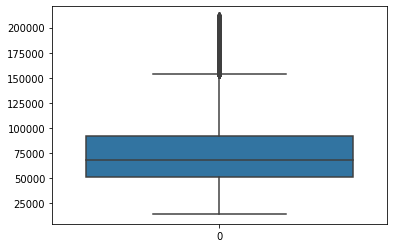

In [82]:
sns.boxplot(df1['Home Ownership'])

<Axes: >

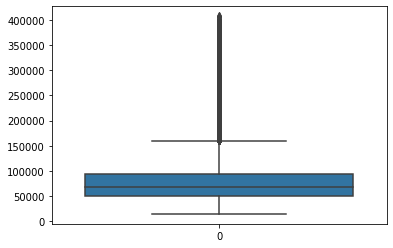

In [83]:
sns.boxplot(test['Home Ownership'])

In [84]:
q = test["Home Ownership"].quantile(0.98)
df2= test[test["Home Ownership"]<q]

<Axes: >

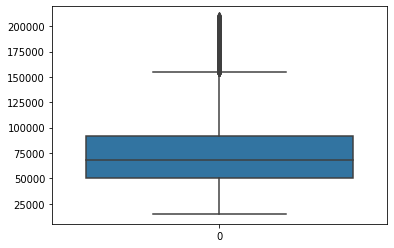

In [85]:
sns.boxplot(df2['Home Ownership'])

<Axes: >

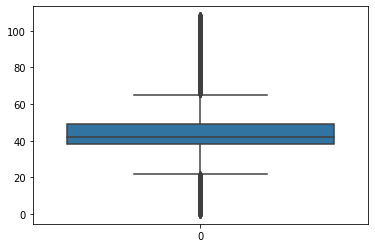

In [86]:
sns.boxplot(train['Loan Title'])

In [87]:
q = train["Loan Title"].quantile(0.96)
df1= train[train["Loan Title"]<q]

<Axes: >

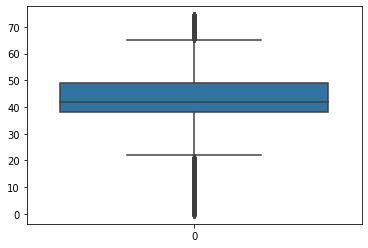

In [88]:
sns.boxplot(df1['Loan Title'])

<Axes: >

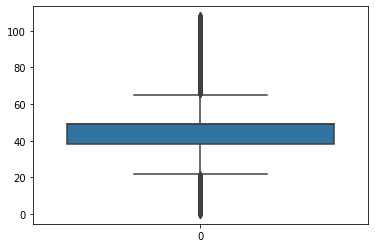

In [89]:
sns.boxplot(test['Loan Title'])

In [90]:
q = test["Loan Title"].quantile(0.96)
df2= test[test["Loan Title"]<q]

<Axes: >

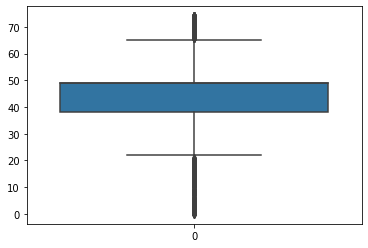

In [91]:
sns.boxplot(df2['Loan Title'])

<Axes: >

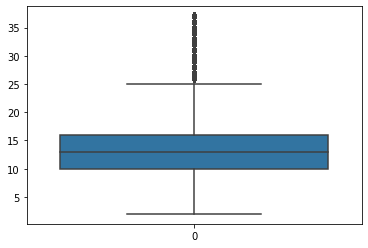

In [92]:
sns.boxplot(train['Open Account'])

In [93]:
q = train["Open Account"].quantile(0.98)
df1= train[train["Open Account"]<q]

<Axes: >

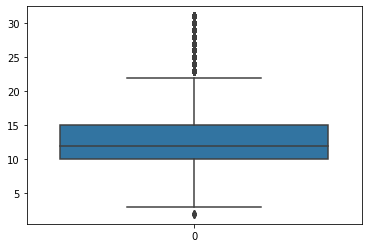

In [94]:
sns.boxplot(df1['Open Account'])

<Axes: >

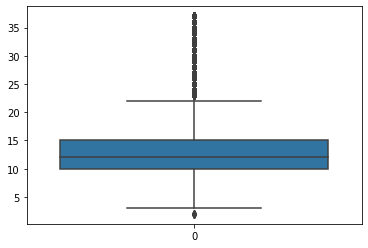

In [95]:
sns.boxplot(test['Open Account'])

In [96]:
q = test["Open Account"].quantile(0.98)
df2= test[test["Open Account"]<q]

<Axes: >

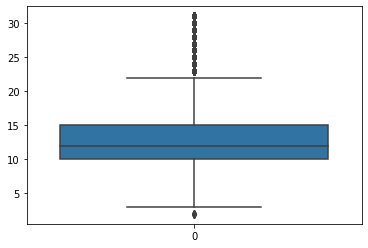

In [97]:
sns.boxplot(df2['Open Account'])

<Axes: >

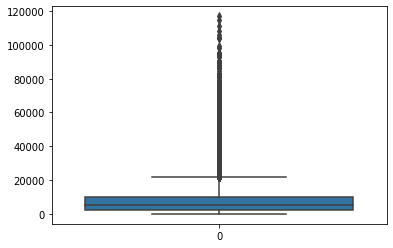

In [98]:
sns.boxplot(train['Revolving Balance'])

In [99]:
q = train["Revolving Balance"].quantile(0.98)
df1= train[train["Revolving Balance"]<q]

<Axes: >

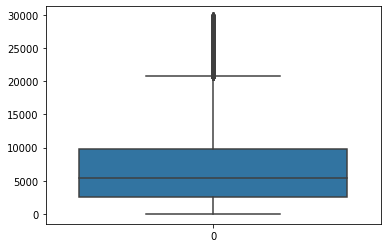

In [100]:
sns.boxplot(df1['Revolving Balance'])

<Axes: >

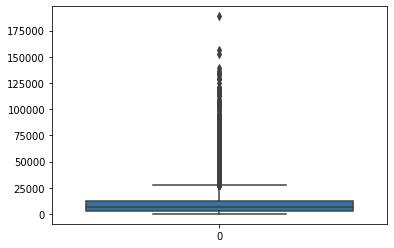

In [101]:
sns.boxplot(test['Revolving Balance'])

In [102]:
q = test["Revolving Balance"].quantile(0.98)
df2= test[test["Revolving Balance"]<q]

<Axes: >

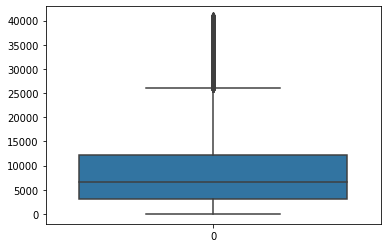

In [103]:
sns.boxplot(df2['Revolving Balance'])

<Axes: >

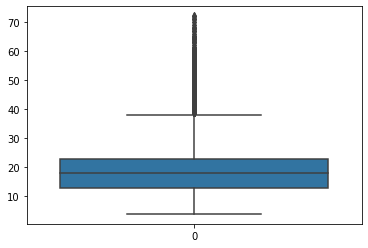

In [104]:
sns.boxplot(train['Total Accounts'])

In [105]:
q = train["Total Accounts"].quantile(0.98)
df1= train[train["Total Accounts"]<q]

<Axes: >

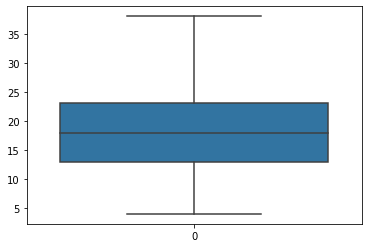

In [106]:
sns.boxplot(df1['Total Accounts'])

<Axes: >

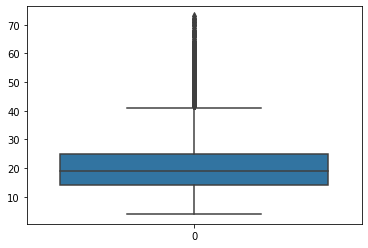

In [107]:
sns.boxplot(test['Total Accounts'])

In [108]:
q = test["Total Accounts"].quantile(0.98)
df2= test[test["Total Accounts"]<q]

<Axes: >

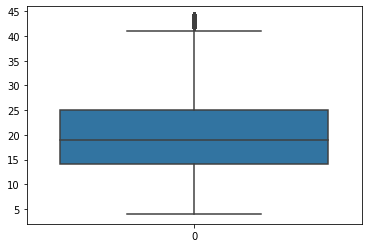

In [109]:
sns.boxplot(df2['Total Accounts'])

<Axes: >

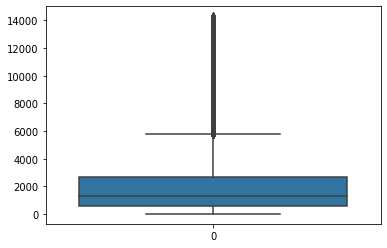

In [110]:
sns.boxplot(train['Total Received Interest'])

In [111]:
q = train["Total Received Interest"].quantile(0.98)
df1= train[train["Total Received Interest"]<q]

<Axes: >

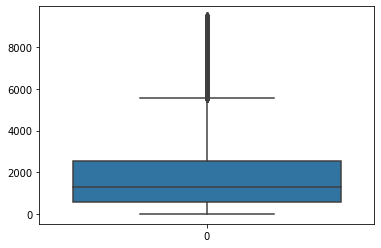

In [112]:
sns.boxplot(df1['Total Received Interest'])

<Axes: >

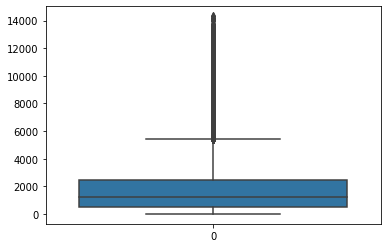

In [113]:
sns.boxplot(test['Total Received Interest'])

In [114]:
q = test["Total Received Interest"].quantile(0.98)
df2= test[test["Total Received Interest"]<q]

<Axes: >

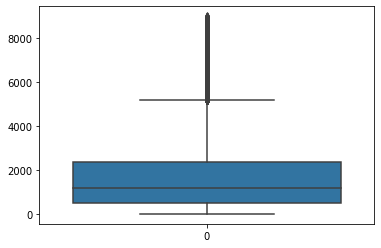

In [115]:
sns.boxplot(df2['Total Received Interest'])

<Axes: >

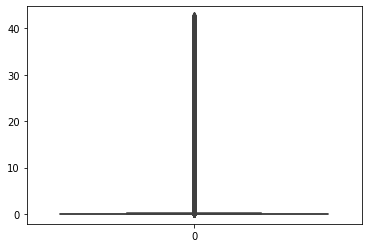

In [116]:
sns.boxplot(train['Total Received Late Fee'])

In [117]:
q = train["Total Received Late Fee"].quantile(0.98)
df1= train[train["Total Received Late Fee"]<q]

<Axes: >

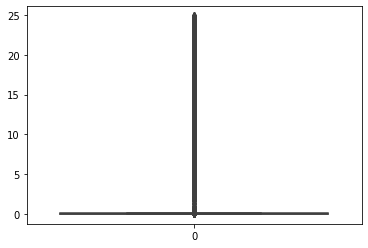

In [118]:
sns.boxplot(df1['Total Received Late Fee'])

<Axes: >

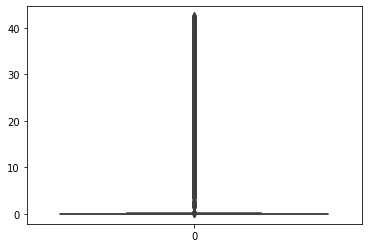

In [119]:
sns.boxplot(test['Total Received Late Fee'])

In [120]:
q = test["Total Received Late Fee"].quantile(0.98)
df2= test[test["Total Received Late Fee"]<q]

<Axes: >

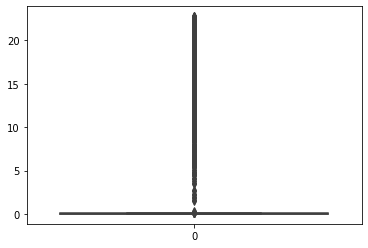

In [121]:
sns.boxplot(df2['Total Received Late Fee'])

<Axes: >

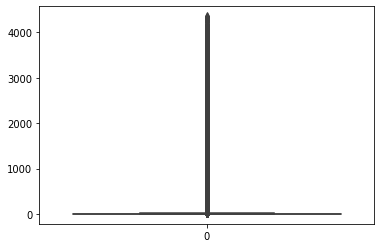

In [122]:
sns.boxplot(train['Recoveries'])

In [123]:
q = train["Recoveries"].quantile(0.98)
df1= train[train["Recoveries"]<q]

<Axes: >

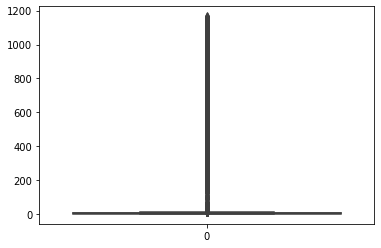

In [124]:
sns.boxplot(df1['Recoveries'])

<Axes: >

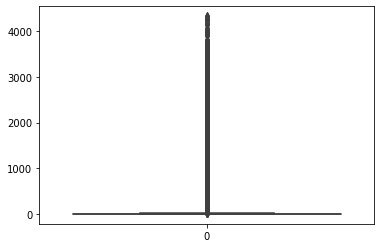

In [125]:
sns.boxplot(test['Recoveries'])

In [126]:
q = test["Recoveries"].quantile(0.98)
df2= test[test["Recoveries"]<q]

<Axes: >

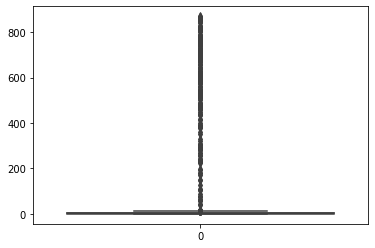

In [127]:
sns.boxplot(df2['Recoveries'])

<Axes: >

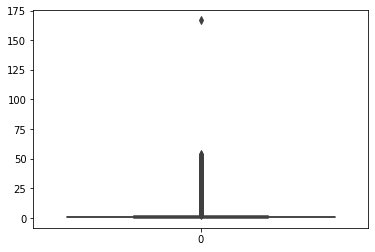

In [128]:
sns.boxplot(train['Collection Recovery Fee'])

In [129]:
q = train["Collection Recovery Fee"].quantile(0.98)
df1= train[train["Collection Recovery Fee"]<q]

<Axes: >

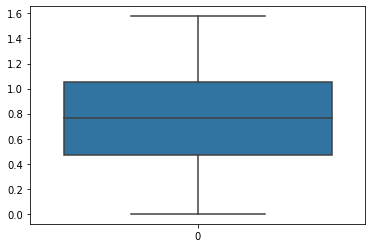

In [130]:
sns.boxplot(df1['Collection Recovery Fee'])

<Axes: >

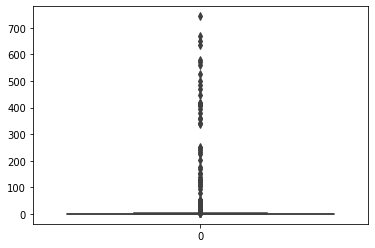

In [131]:
sns.boxplot(test['Collection Recovery Fee'])

In [132]:
q = test["Collection Recovery Fee"].quantile(0.98)
df2= test[test["Collection Recovery Fee"]<q]

<Axes: >

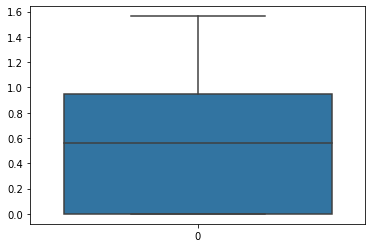

In [133]:
sns.boxplot(df2['Collection Recovery Fee'])

<Axes: >

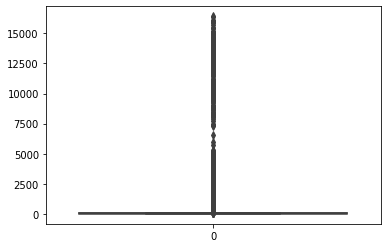

In [134]:
sns.boxplot(train['Total Collection Amount'])

In [135]:
q = train["Total Collection Amount"].quantile(0.98)
df1= train[train["Total Collection Amount"]<q]


<Axes: >

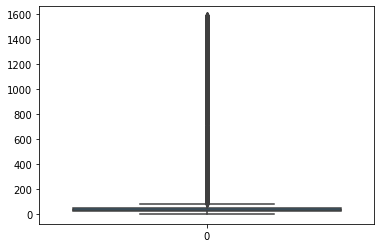

In [136]:
sns.boxplot(df1['Total Collection Amount'])

<Axes: >

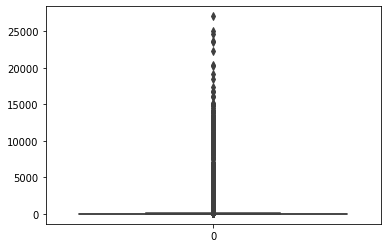

In [137]:

sns.boxplot(test['Total Collection Amount'])

In [138]:
q = test["Total Collection Amount"].quantile(0.98)
df2= test[test["Total Collection Amount"]<q]


<Axes: >

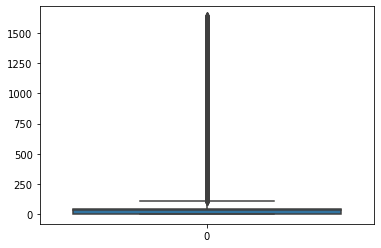

In [139]:
sns.boxplot(df2['Total Collection Amount'])

<Axes: >

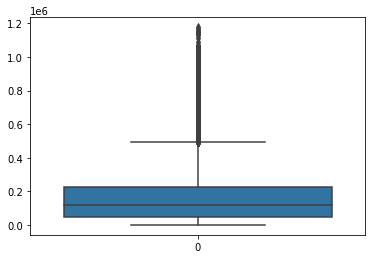

In [140]:
sns.boxplot(train['Total Current Balance'])

In [141]:
q = train["Total Current Balance"].quantile(0.98)
df1= train[train["Total Current Balance"]<q]


<Axes: >

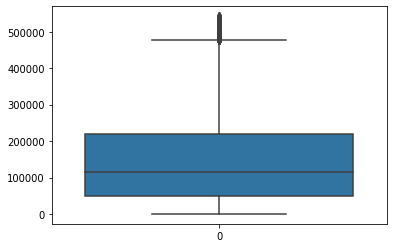

In [142]:
sns.boxplot(df1['Total Current Balance'])

<Axes: >

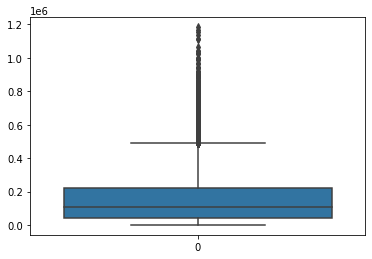

In [143]:
sns.boxplot(test['Total Current Balance'])

In [144]:
q = test["Total Current Balance"].quantile(0.98)
df2= test[test["Total Current Balance"]<q]


<Axes: >

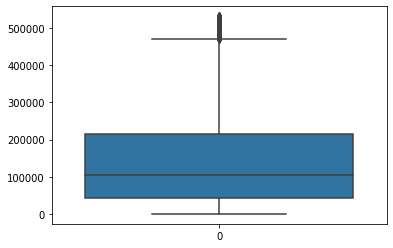

In [145]:
sns.boxplot(df2['Total Current Balance'])

<Axes: >

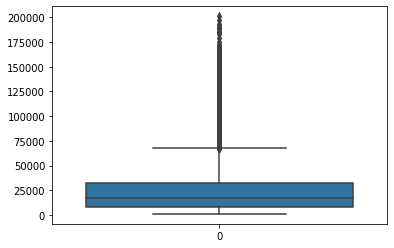

In [146]:
sns.boxplot(train['Total Revolving Credit Limit'])

In [147]:
q = train["Total Revolving Credit Limit"].quantile(0.98)
df1= train[train["Total Revolving Credit Limit"]<q]


<Axes: >

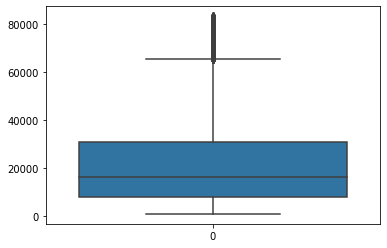

In [148]:
sns.boxplot(df1['Total Revolving Credit Limit'])

<Axes: >

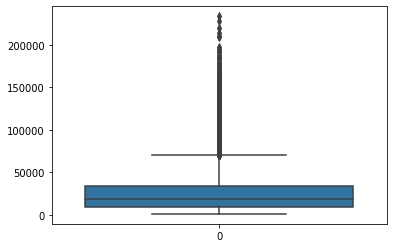

In [149]:
sns.boxplot(test['Total Revolving Credit Limit'])

In [150]:
q = test["Total Revolving Credit Limit"].quantile(0.98)
df2= test[test["Total Revolving Credit Limit"]<q]


<Axes: >

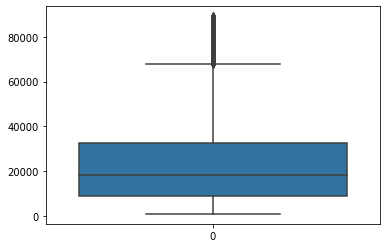

In [151]:
sns.boxplot(df2['Total Revolving Credit Limit'])

In [152]:
df1.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.611300e+04,66113.000000,66113.000000,66113.000000,66113.000000,66113.000000,66113.000000,66113.000000,66113.000000,66113.000000,...,66113.000000,66113.000000,66113.000000,66113.000000,66113.000000,66113.0,66113.000000,6.611300e+04,66113.000000,66113.000000
mean,2.564907e+07,16847.192473,15762.588719,14618.271531,58.174081,18.882565,11.842222,1.814136,11.953973,0.819415,...,59.674661,1.127959,0.021161,0.001800,71.174943,0.0,146.336908,1.595270e+05,21437.653638,0.092493
std,2.110701e+07,8364.638806,8146.863227,6781.128875,3.324195,11.347559,3.716042,1.382608,7.397745,0.929843,...,357.526751,3.507722,0.143921,0.042388,43.309189,0.0,741.998908,1.388847e+05,17174.659802,0.289723
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,0.000000,5.320006,0.000000,0.000000,0.000000,...,0.000036,0.000036,0.000000,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.576118e+06,10012.000000,9260.000000,9831.880060,58.000000,9.000000,9.293523,1.000000,6.000000,0.000000,...,1.627149,0.475186,0.000000,0.000000,35.000000,0.0,24.000000,5.033900e+04,8014.000000,0.000000
50%,1.791832e+07,16071.000000,13040.000000,12791.897480,59.000000,19.000000,11.372963,2.000000,11.000000,0.000000,...,3.342180,0.779802,0.000000,0.000000,68.000000,0.0,36.000000,1.183660e+05,16278.000000,0.000000
75%,4.276681e+07,22100.000000,21779.000000,17786.261430,59.000000,28.000000,14.187309,3.000000,17.000000,2.000000,...,5.454092,1.070325,0.000000,0.000000,105.000000,0.0,46.000000,2.283650e+05,30970.000000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,40.000000,27.182348,6.000000,34.000000,2.000000,...,4354.467419,166.833000,1.000000,1.000000,161.000000,0.0,16421.000000,1.165601e+06,83156.000000,1.000000


In [153]:
df2.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
count,2.833400e+04,28334.000000,28334.000000,28334.000000,28334.000000,28334.000000,28334.000000,28334.000000,28334.000000,28334.000000,...,28334.000000,28334.000000,28334.000000,28334.000000,28334.000000,28334.000000,28334.000000,28334.000000,2.833400e+04,28334.000000
mean,2.935737e+07,16335.400155,15550.850039,14674.114053,54.592857,18.660090,12.212036,1.819122,11.806275,0.831580,...,0.928724,50.387359,1.410574,0.019764,0.001024,65.171172,0.000953,160.234206,1.516704e+05,23167.302181
std,2.204444e+07,8332.409791,8199.440905,7186.461537,8.948582,11.317556,3.907722,1.363671,7.200537,0.934601,...,4.776996,335.508704,15.290604,0.139192,0.031976,42.524263,0.030855,911.479607,1.376929e+05,17972.811351
min,1.297893e+06,1000.000000,1000.000000,1000.000000,36.000000,0.000000,5.320000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.260000e+02,1000.000000
25%,8.226055e+06,9719.000000,9129.250000,9669.208339,58.000000,9.000000,9.456696,1.000000,6.000000,0.000000,...,0.000000,0.015831,0.006173,0.000000,0.000000,29.000000,0.000000,4.000000,4.367375e+04,9154.500000
50%,2.570459e+07,15534.000000,13103.000000,12871.431460,59.000000,19.000000,11.716477,2.000000,11.000000,0.000000,...,0.028211,2.182462,0.583029,0.000000,0.000000,60.000000,0.000000,30.000000,1.081515e+05,18399.500000
75%,4.843919e+07,21554.750000,21448.750000,19000.000000,59.000000,27.000000,14.650000,3.000000,16.000000,2.000000,...,0.061210,4.625285,0.976813,0.000000,0.000000,96.000000,0.000000,44.000000,2.205102e+05,32700.000000
max,7.226845e+07,35000.000000,35000.000000,35000.000000,60.000000,40.000000,27.310000,6.000000,34.000000,2.000000,...,42.520996,4325.594909,743.166000,1.000000,1.000000,161.000000,1.000000,27076.000000,1.183282e+06,89172.000000


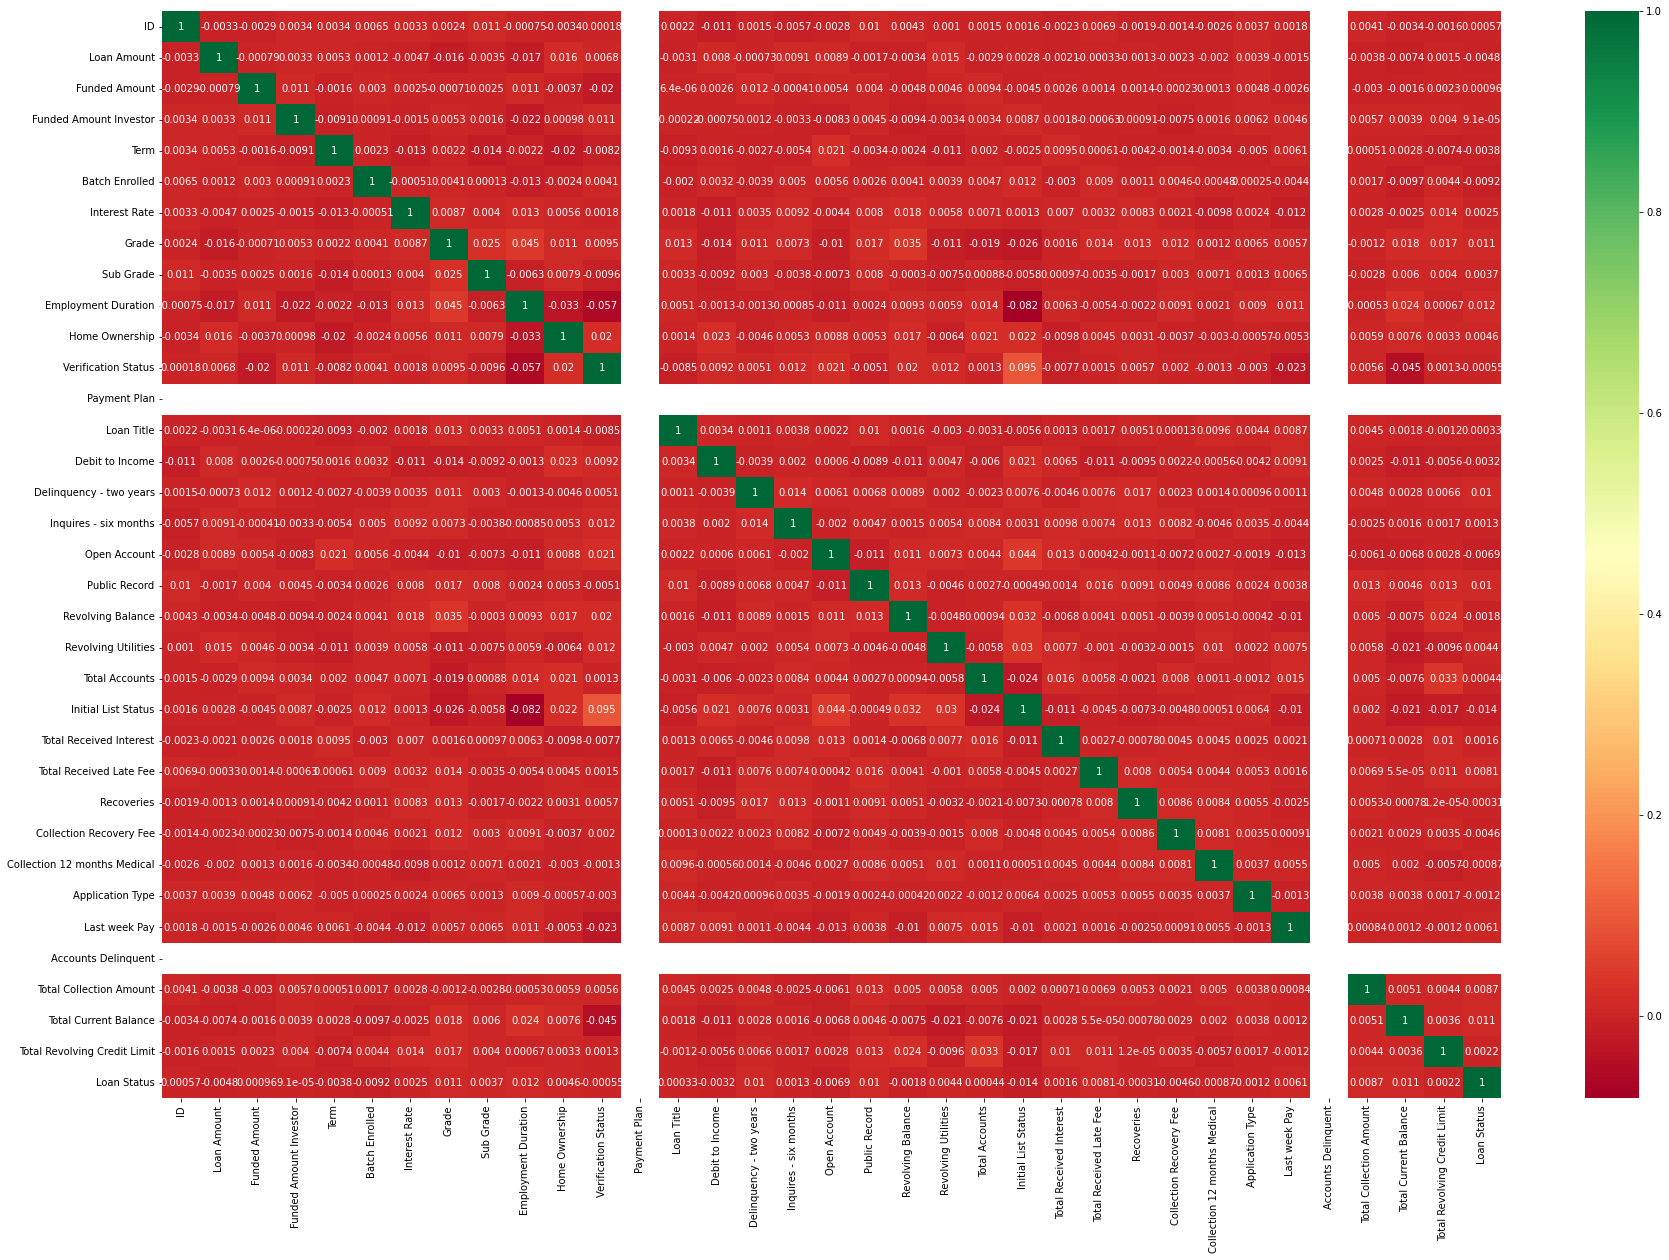

In [154]:
##Correlation between all the features
plt.figure(figsize=(30,20))
# showcase heatmap
p = sns.heatmap(df1.corr(), annot=True,cmap ='RdYlGn')

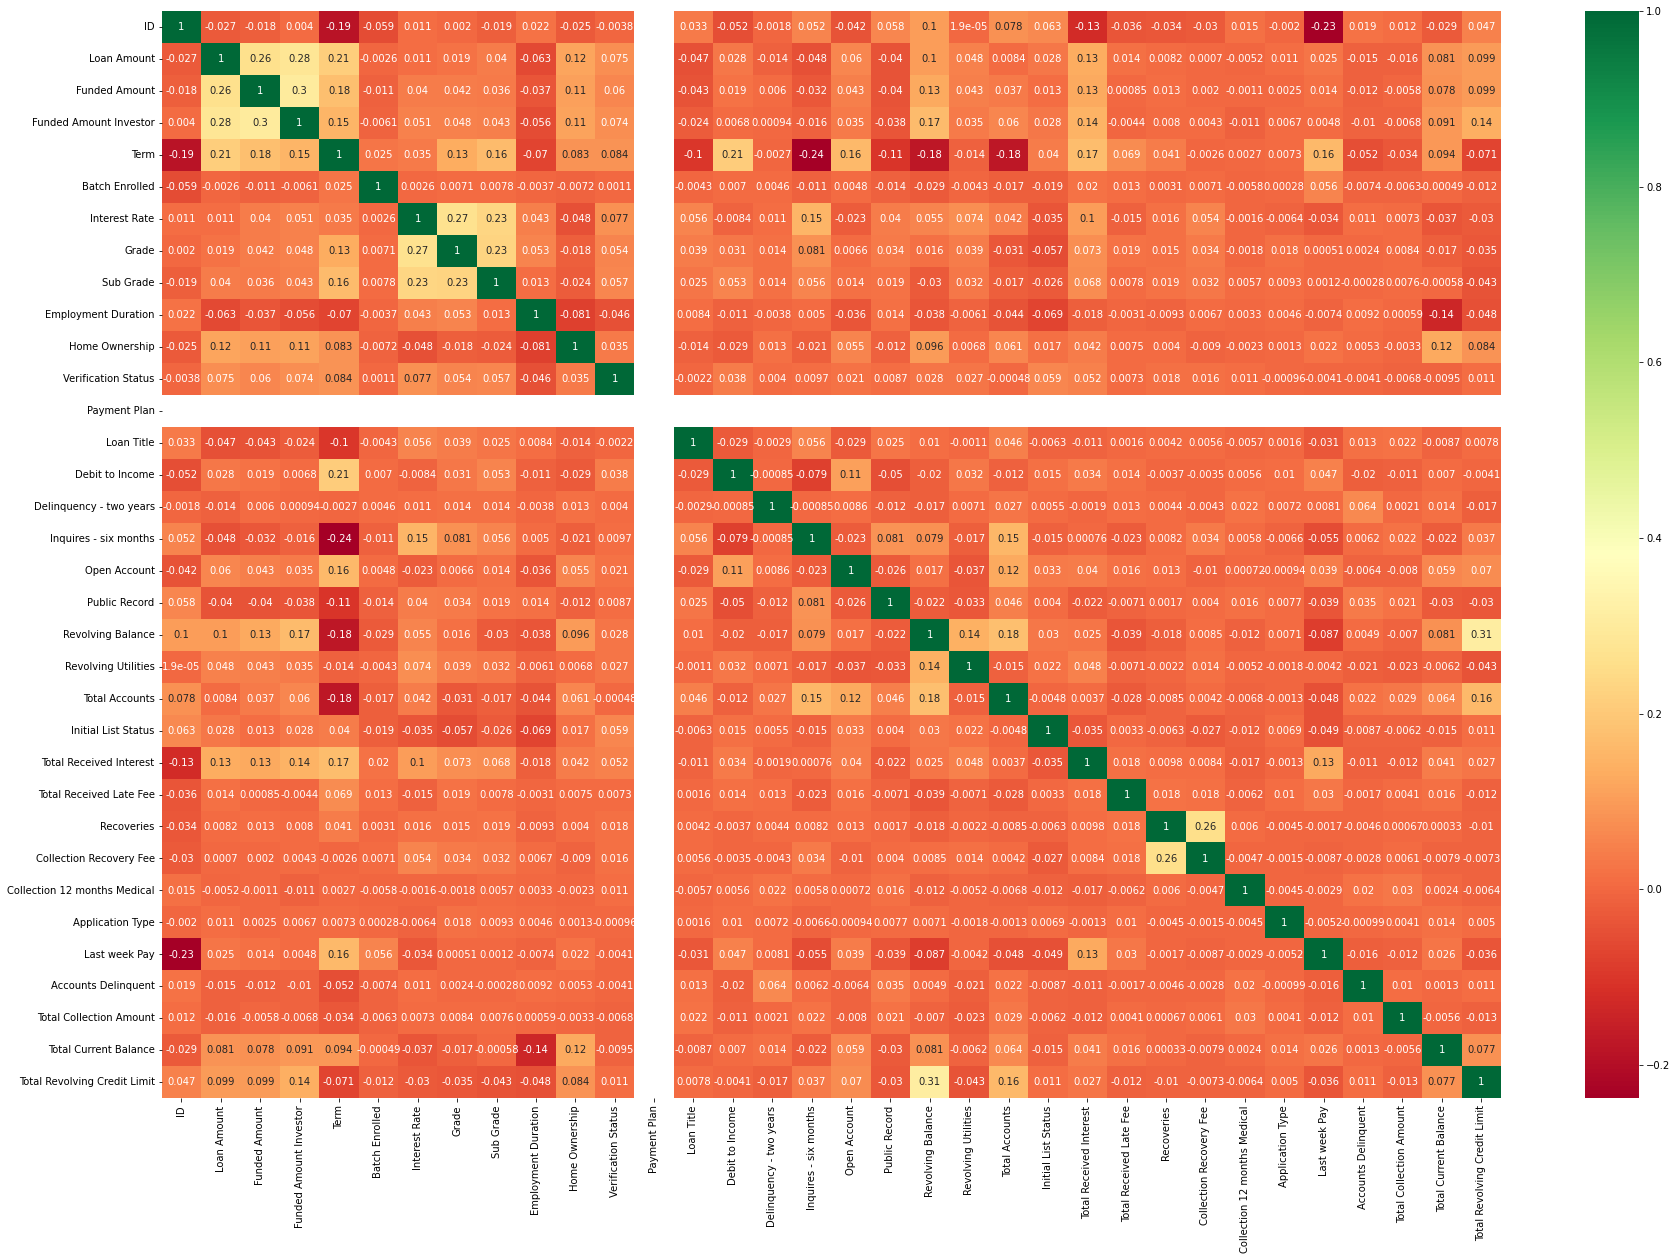

In [155]:
##Correlation between all the features
plt.figure(figsize=(30,20))
# showcase heatmap
p = sns.heatmap(df2.corr(), annot=True,cmap ='RdYlGn')